In [ ]:
# Bloco 1 - Imports e configurações

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# (Opcional, mas deixa os gráficos mais bonitos. Se não quiser, pode remover.)
import seaborn as sns
sns.set(style="whitegrid")

In [3]:
# Bloco 2 - Carregando o dataset

DATA_PATH = r"C:\Users\User\Documents\Eng_Comp\periodo 8\sistemas inteligentes\trabalho2\rf_indoor_positioning_classification\data\uerj_wifi_indoorLoc_points.csv"  # ajuste se o arquivo estiver em outra pasta

df = pd.read_csv(DATA_PATH)

# Visão geral das primeiras linhas
df.head()


,point,floor,X,Y,Z
0,1,4,0.0,17.15,-3.6
1,2,4,3.0,17.15,-3.6
2,3,4,6.0,17.15,-3.6
3,4,4,9.0,17.15,-3.6
4,5,4,12.0,17.15,-3.6


In [4]:
# Bloco 3 - Informações básicas do dataset

print("Formato do dataset (linhas, colunas):", df.shape)
print("\nTipos de dados:")
print(df.dtypes)

print("\nVerificando valores ausentes por coluna:")
print(df.isna().sum())

print("\nResumo estatístico das variáveis numéricas:")
display(df.describe())


Formato do dataset (linhas, colunas): (816, 5)

Tipos de dados:
point      int64
floor      int64
X        float64
Y        float64
Z        float64
dtype: object

Verificando valores ausentes por coluna:
point    0
floor    0
X        0
Y        0
Z        0
dtype: int64

Resumo estatístico das variáveis numéricas:


,point,floor,X,Y,Z
count,816.000000,816.000000,816.000000,816.000000,816.000000
mean,420.008578,4.987745,114.110135,41.683824,-1.085294
std,245.537125,0.809360,54.611371,22.688186,3.080396
min,1.000000,4.000000,0.000000,9.250000,-6.300000
25%,209.750000,4.000000,70.500000,17.150000,-3.600000
50%,419.500000,5.000000,114.110000,45.900000,-1.800000
75%,623.250000,6.000000,157.700000,55.100000,1.800000
max,939.000000,6.000000,228.200000,92.600000,3.600000


floor
4    272
5    282
6    262
Name: count, dtype: int64


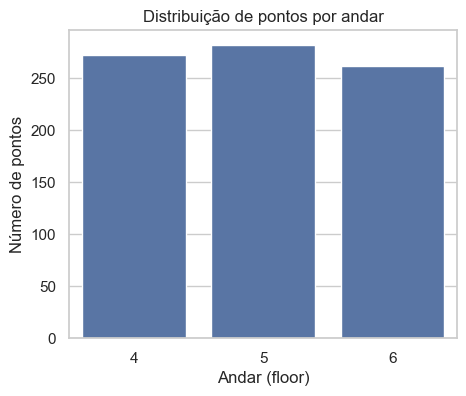

In [5]:
# Bloco 4 - Distribuição da variável alvo (floor)

floor_counts = df['floor'].value_counts().sort_index()
print(floor_counts)

plt.figure(figsize=(5,4))
sns.barplot(x=floor_counts.index, y=floor_counts.values)
plt.xlabel("Andar (floor)")
plt.ylabel("Número de pontos")
plt.title("Distribuição de pontos por andar")
plt.show()


floor
4    272
5    282
6    262
Name: count, dtype: int64


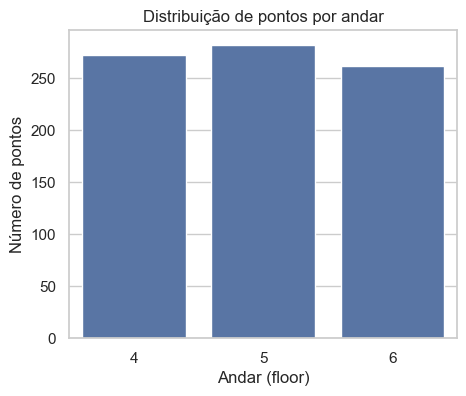

In [6]:
# Bloco 4 - Distribuição da variável alvo (floor)

floor_counts = df['floor'].value_counts().sort_index()
print(floor_counts)

plt.figure(figsize=(5,4))
sns.barplot(x=floor_counts.index, y=floor_counts.values)
plt.xlabel("Andar (floor)")
plt.ylabel("Número de pontos")
plt.title("Distribuição de pontos por andar")
plt.show()


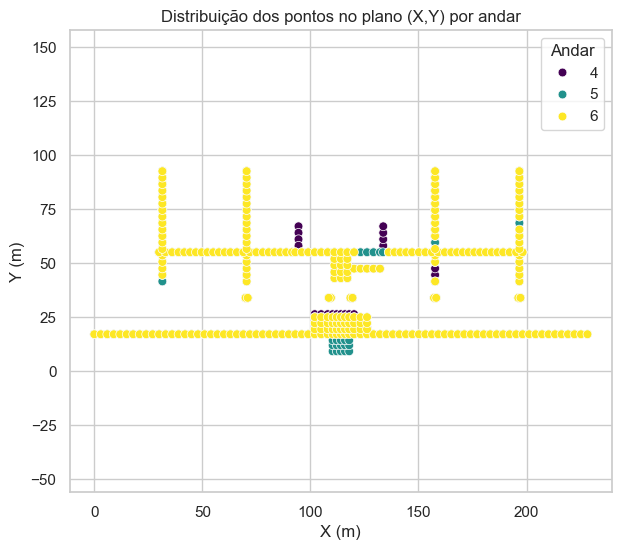

In [7]:
# Bloco 6 - Dispersão X vs Y colorida pelos andares

plt.figure(figsize=(7,6))
sns.scatterplot(
    data=df,
    x='X', y='Y',
    hue='floor',
    palette='viridis',
    s=40
)
plt.title("Distribuição dos pontos no plano (X,Y) por andar")
plt.xlabel("X (m)")
plt.ylabel("Y (m)")
plt.legend(title="Andar")
plt.axis('equal')  # tenta manter escala igual nos eixos
plt.show()


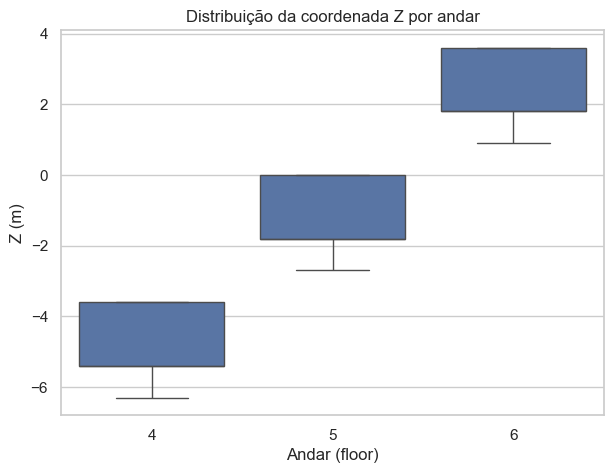

In [8]:
# Bloco 7 - Distribuição de Z por andar

plt.figure(figsize=(7,5))
sns.boxplot(data=df, x='floor', y='Z')
plt.xlabel("Andar (floor)")
plt.ylabel("Z (m)")
plt.title("Distribuição da coordenada Z por andar")
plt.show()


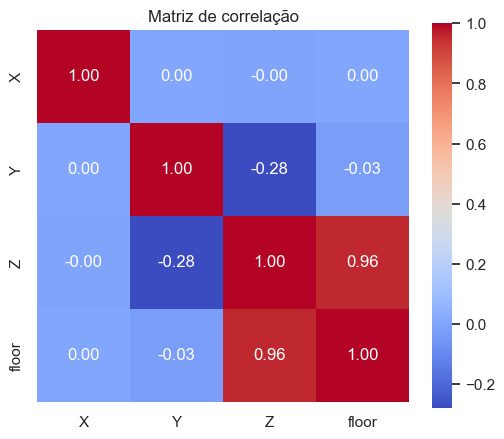

In [9]:
# Bloco 8 - Correlação entre as variáveis numéricas

corr = df[['X', 'Y', 'Z', 'floor']].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Matriz de correlação")
plt.show()


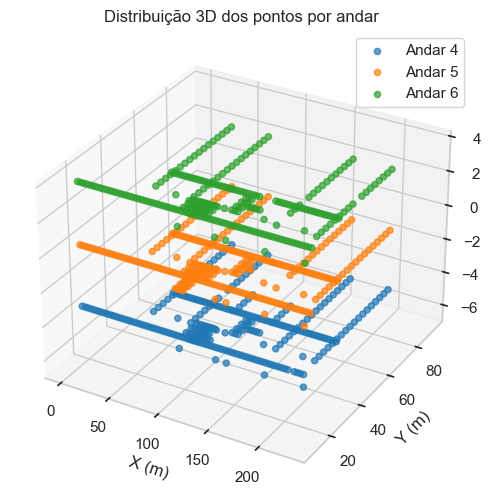

In [ ]:
# Bloco 9 - Dispersão 3D das coordenadas por andar (opcional)

from mpl_toolkits.mplot3d import Axes3D  # necessário para o 3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

floors = sorted(df['floor'].unique())
colors = ['tab:blue', 'tab:orange', 'tab:green']

for floor, color in zip(floors, colors):
    subset = df[df['floor'] == floor]
    ax.scatter(subset['X'], subset['Y'], subset['Z'], label=f"Andar {floor}", s=20, alpha=0.7, c=color)

ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')
ax.set_title('Distribuição 3D dos pontos por andar')
ax.legend()
plt.show()